<a href="https://colab.research.google.com/github/1man1/2020-11-study/blob/main/Unit_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

nit 9에서는 제주도의 남녀 성별 비율을 알아보고자 파이 차트로 시각화하였습니다. 그림 10-1을 보니 제주도의 남녀 비율은 거의 50:50인 것을 한눈에 알 수 있습니다.

Unit 9에서 만들었던 항아리 모양의 수평 막대그래프를 다시 확인하니 80대 이후에는 여성이 많고 40대 후반 무렵에는 남성이 더 많은 것 같습니다. 더 자세히 살펴보면 20대는 남성이 더 많고, 30대는 비슷한 것 같습니다. 하지만 정확하게 어떻게 다른지 한눈에 알아보기는 어렵습니다.

어떻게 하면 제주도의 연령대별 성별 비율을 지금보다 더 알아보기 쉽게 표현할 수 있을까요?

1 꺾은선 그래프로 표현하기

먼저 남성 데이터와 여성 데이터를 서로 다른 색의 꺾은선 그래프로 표현하면 연령대별 성별 비율을 쉽게 알 수 있습니다.

코드를 작성해 보겠습니다. 먼저 데이터를 불러오고 연령별 남성, 여성 인구 숫자를 저장할 리스트를 하나씩 만듭니다.

궁금한 동네를 입력해주세요: 이태원


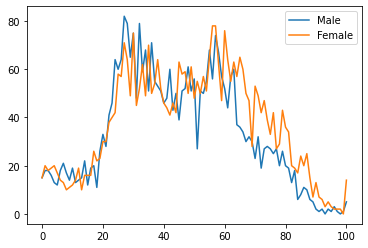

In [ ]:
import csv
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
m = []
f = []

name = input('궁금한 동네를 입력해주세요: ')
for row in data :
    if name in row[0] :
        for i in range(3,104) :
            m.append(int(row[i]))      # 남성 데이터 저장하기
            f.append(int(row[i+103]))  # 여성 데이터 저장하기

        break
import matplotlib.pyplot as plt
plt.plot(m, label='Male')
plt.plot(f, label='Female')
plt.legend()
plt.show()

꺾은선 그래프로 나타냈더니, 항아리 모양 그래프로 나타냈을 때보다 남녀 인구의 차이가 눈에 더 잘 들어옵니다.

이번에는 또 다른 방법을 생각해 보겠습니다. 연령별로 남성 인구수에서 여성 인구수를 뺀 차이를 막대그래프로 표현하면, 연령대별로 성별이 어떻게 차이가 나는지 쉽게 알 수 있습니다.

2 막대그래프로 표현하기

궁금한 동네를 입력해주세요: 제주특별자치도


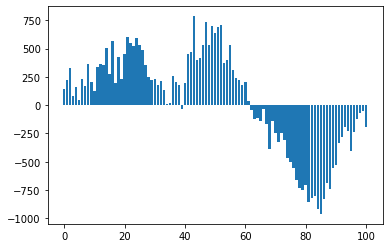

In [ ]:
import csv
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
result = []
name = input('궁금한 동네를 입력해주세요: ')
for row in data :
    if name in row[0] :
        for i in range(3,104) :
            result.append(int(row[i]) - int(row[i+103]))
        break
import matplotlib.pyplot as plt
plt.bar(range(101), result)
plt.show()

3 산점도로 표현하기

이번에는 데이터 간의 관계를 파악하는 데 도움이 되는 산점도를 그려보고자 합니다. 산점도는 가로축과 세로축을 기준으로 두 요소가 서로 어떤 관계를 맺고 있는지를 파악하기 쉽게 나타낸 그래프입니다.

예를 들어, 가로축을 제주도 지역의 남성 인구수, 세로축을 제주도 지역의 여성 인구수라고 설정합니다. 두 요소를 기준으로 그린 산점도는 남성 인구수와 여성 인구수 사이에 어떤 관계가 있는지 파악하기 쉽습니다.

그림 10-5를 보면 산점도 내 다양한 색상의 점이 있습니다. 이 점들은 연령대에 따른 인구를 뜻하며, 그래프 오른쪽에 있는 컬러바(colorbar)를 참고하여 각 점의 색깔로 나이대를 알 수 있습니다.

또한 여기에서 대각선으로 그려진 초록색 선은 남성과 여성이 동일한 비율일 때를 의미합니다. 노란색 계열의 점을 기준으로 왼쪽에 있는 점들은 초록색 선 위에, 오른쪽에 있는 점들은 초록색 선 아래에 밀집해 있네요. 이를 통해 노란색, 즉 60대 초중반 즈음을 기점으로 남녀의 성비가 바뀐다는 사실을 알 수 있습니다.

그리고 그림 10-6과 같이 남녀 연령대별 인구수를 점의 크기로 나타내는 것도 가능합니다.

이렇게 점의 크기로 또 다른 정보를 표현할 수 있는 산점도를 ‘버블 차트’라고도 합니다.

버블 차트는 데이터를 의미하는 점들의 분포로 상관관계를 파악할 수 있다는 점에서 산점도와 비슷합니다. 점의 크기를 다르게 하여 버블로 표현하며, 버블을 겹쳐서 표현할 수도 있습니다. 버블의 위치로는 남녀 성비를, 버블의 크기로는 연령대별 인구수를 표현할 수 있듯이 하나의 그래프 안에 남녀 성비, 연령대별 인구수 등 다양한 정보를 담을 수 있습니다.

그러면 이와 같은 형태로 데이터를 표현하려면 어떻게 해야 할까요?

4 scatter( ) 함수로 표현하기

산점도는 scatter() 함수를 사용하여 표현할 수 있습니다. ‘scatter’라는 단어는 ‘흩뿌리다, 사방으로 흩어지다’ 등의 의미로, 산점도는 여기저기 점이 흩어진 모양의 그래프를 의미합니다.

산점도는 x축과 y축에 해당하는 데이터의 상관관계를 표현할 때 사용하며 점이 흩어져있는 그래프라는 의미입니다. 두 개의 축을 기준으로 데이터가 얼마나 퍼져있는지(분포) 알 수 있어 ‘산포도(散布度)’라고도 불립니다.

scatter() 함수는 bar() 함수와 비슷하게 x축에 해당하는 데이터와 y축에 해당하는 데이터를 각각 넣으면 그에 해당하는 산점도가 그려집니다.

다음 코드에서 입력된 데이터를 순서쌍으로 표현하면 (1, 10), (2, 30), (3, 20), (4, 40)입니다. 따라서 해당 좌표에 점이 찍힌 산점도가 그려집니다.

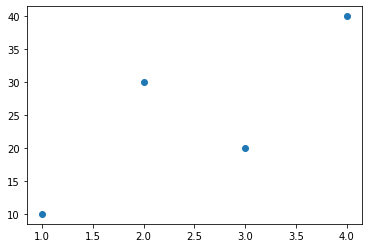

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([1,2,3,4], [10,30,20,40])
plt.show()

TIP

격자 무늬 스타일을 지정하고 싶을 경우 다음 코드를 둘째줄에 추가하면 됩니다.

plt.style.use('ggplot')

5 버블 차트로 표현하기

scatter() 함수는 버블 차트를 그릴 때도 사용할 수 있습니다. scatter() 함수로 버블 차트를 나타내려면 기존 코드에서 size를 의미하는 s 속성을 추가하고 원하는 크기를 입력합니다. 간단하죠?

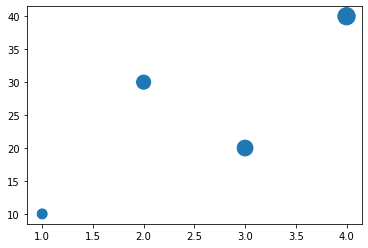

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([1,2,3,4], [10,30,20,40], s=[100,200,250,300])
plt.show()

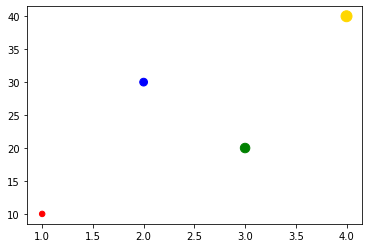

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([1,2,3,4], [10,30,20,40], s=[30,60,90,120], c=['red','blue','green','gold'])
plt.show()

scatter() 함수에 c 속성을 추가하여 표현하고 싶은 색상의 개수를 설정하면 각 데이터에 해당하는 컬러바의 색으로 정해집니다. 여기서는 4개의 점을 각각 다른 색으로 표현하기 위해 c=range(4)를 추가하였습니다.

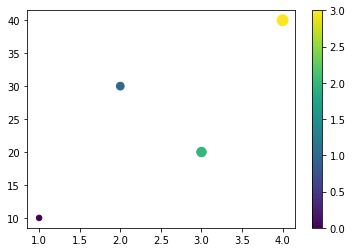

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([1,2,3,4], [10,30,20,40], s=[30,60,90,120], c=range(4))
plt.colorbar()
plt.show()

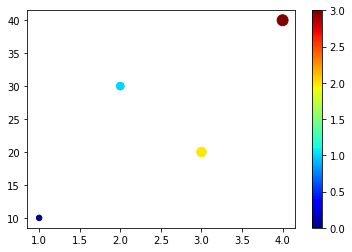

In [ ]:
import matplotlib.pyplot as plt
plt.scatter([1,2,3,4], [10,30,20,40], s=[30,60,90,120], c=range(4), cmap='jet')
plt.colorbar()
plt.show()

지금까지는 기본적인 내용을 이해하는 것에 집중하기 위해 4개의 점만을 표현했기 때문에 산점도라는 말이 크게 와닿지 않았을 겁니다. 그래서 이번에는 랜덤 함수를 활용해 위치와 크기가 서로 다른 100개의 점들을 만들겠습니다.

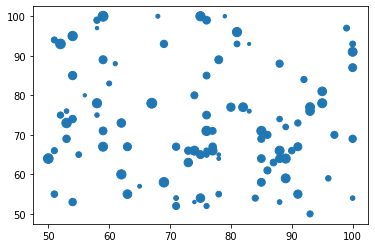

In [ ]:
import matplotlib.pyplot as plt
import random
x = []
y = []
size = []
for i in range(100) :
    x.append(random.randint(50,100))
    y.append(random.randint(50,100))
    size.append(random.randint(10,100))
plt.scatter(x, y, s=size)
plt.show()

지금까지는 기본적인 내용을 이해하는 것에 집중하기 위해 4개의 점만을 표현했기 때문에 산점도라는 말이 크게 와닿지 않았을 겁니다. 그래서 이번에는 랜덤 함수를 활용해 위치와 크기가 서로 다른 100개의 점들을 만들겠습니다.

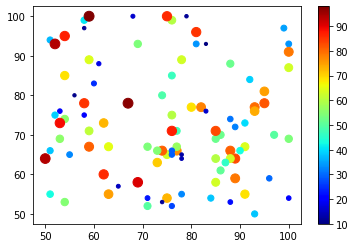

In [ ]:
plt.scatter(x, y, s=size, c=size, cmap='jet')
plt.colorbar()
plt.show()


그런데 이렇게 표현하니 작은 점이 큰 점에 가려지네요. 이럴 때는 alpha 속성으로 투명도를 조절할 수 있습니다. alpha 속성값의 범위는 0부터 1까지이며, 0에 가까울수록 투명하고, 1에 가까울수록 불투명합니다.

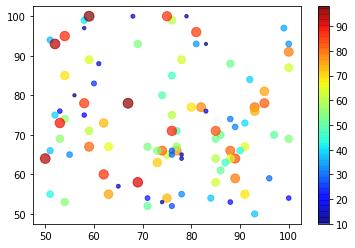

In [ ]:
plt.scatter(x, y, s=size, c=size, cmap='jet', alpha=0.7)
plt.colorbar()
plt.show()

c 속성에 대하여

c 속성은 표현하고 싶은 색상의 수를 의미합니다. c 속성에 다양한 값을 넣어 각 값이 표현하는 그래프를 직접 확인하며 데이터 시각화에 적절한 색상 표현을 연습하세요.

다음 코드는 x축에 해당하는 값의 수만큼 색상의 수를 지정한 예입니다.

제주도의 연령대별 성별 비율을 산점도로 표현하기

In [ ]:
import csv
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
m = []
f = []
name = input('궁금한 동네를 입력해주세요:')
for row in data :
    if name in row[0] :
        for i in range(3,104) :
            m.append(int(row[i]))
            f.append(int(row[i+103]))
        break

궁금한 동네를 입력해주세요:비산동


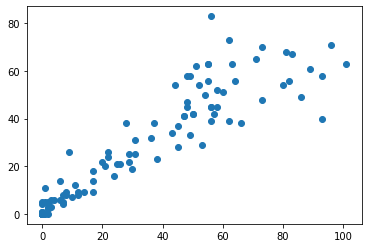

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(m, f)
plt.show()

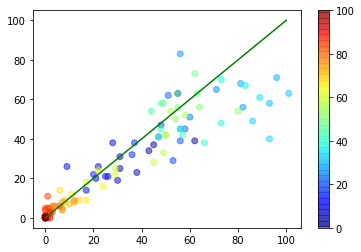

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(m, f, c= range(101), alpha=0.5, cmap='jet') # 컬러맵 적용
plt.colorbar()
plt.plot(range(max(m)),range(max(m)), 'g') # 추세선 추가
plt.show()

제주도의 연령대별 성별 비율을 산점도로 표현하기

궁금한 동네를 입력해주세요 : 제주특별자치도


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backen

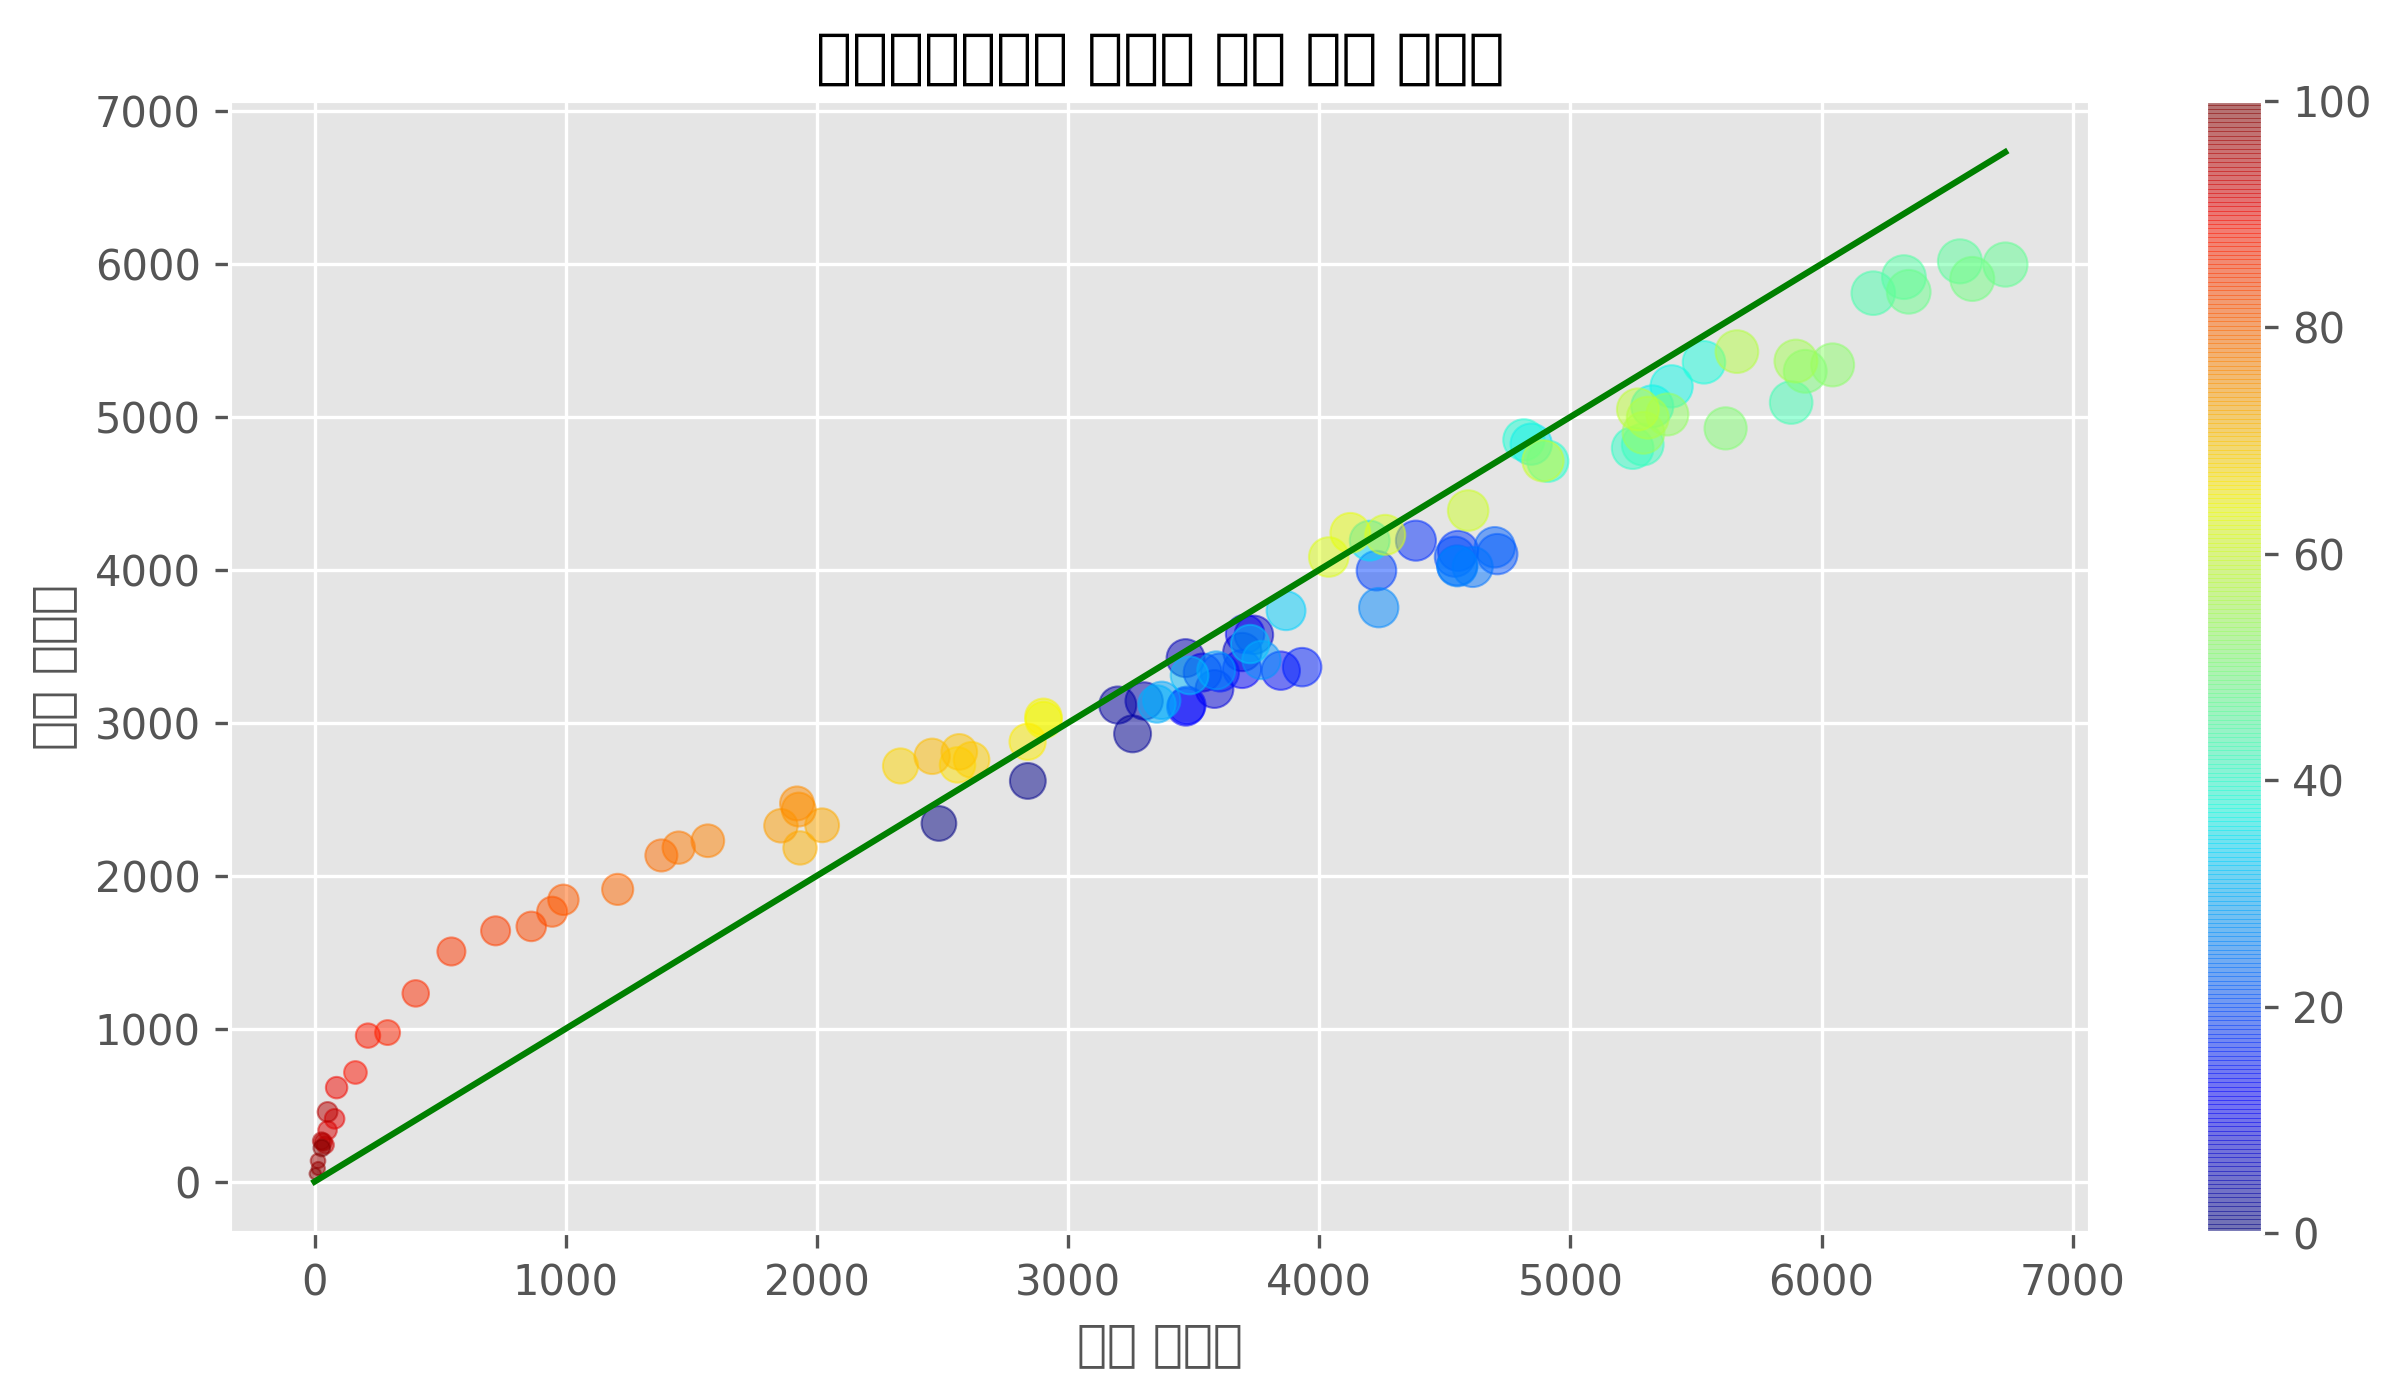

In [ ]:
import csv
import math
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
m = []
f = []
size = []
name = input('궁금한 동네를 입력해주세요 : ')
for row in data :
    if name in row[0] :
        for i in range(3,104) :
            m.append(int(row[i]))
            f.append(int(row[i+103]))
            size.append(math.sqrt(int(row[i])+int(row[i+103])))
        break
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(10,5), dpi=300)
plt.title(name+' 지역의 성별 인구 그래프')
plt.scatter(m, f, s=size, c=range(101), alpha=0.5, cmap='jet')
plt.colorbar()
plt.plot(range(max(m)),range(max(m)), 'g')
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')
plt.show()

sqrt( ) 함수를 사용하지 않으면 어떤 결과가 나타나는지 살펴보고 제곱근을 적용하면 어떤 효과가 생기는지 생각해 보세요.

대중교통 데이터 프로젝트
 

여러분은 얼마나 자주 대중교통을 이용하나요? 대중교통은 정해진 노선과 계획된 시간에 따라 운행되며 정해진 요금을 지불하여 이용할 수 있는 서비스를 말합니다. 대중교통을 이용하는 사람이 많아질수록 대기 오염과 교통 체증을 줄일 수 있지요. 또한, 일주일에 하루씩 자동차 운전을 줄이고 대중교통을 이용하면 연간 약 30만 원을 절약하는 경제적 효과도 있습니다. 그렇다면 대중교통을 이용하는 승객은 얼마나 될까요? 넷째 마당에서는 수도권 대중교통 데이터를 바탕으로 시각화를 연습합시다.

In [ ]:
import csv
import math
f = open('gender.csv',encoding='cp949')
data = csv.reader(f)
m = []
f = []
size = []
name = input('궁금한 동네를 입력해주세요 : ')
for row in data :
    if name in row[0] :
        for i in range(3,104) :
            m.append(int(row[i]))
            f.append(int(row[i+103]))
            size.append(math.sqrt(int(row[i])+int(row[i+103])))
        break
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(10,5), dpi=300)
plt.title(name+' 지역의 성별 인구 그래프')
plt.scatter(m, f, s=size, c=range(101), alpha=0.5, cmap='jet')
plt.colorbar()
plt.plot(range(max(m)),range(max(m)), 'g')
plt.xlabel('남성 인구수')
plt.ylabel('여성 인구수')
plt.show()